# Практическая работа №2: Исследование подгрупп сетей. Сети аффилированности.
Выполнил студент гр. 0383 Черепанов Роман. Вариант №69.

# Цель работы
Овладеть навыками работы с математическими пакетами для исследования подгрупп в социальных сетях, а также моделирования, отображения и анализа сетей аффилированности.

# Основные теоретические положения
**Подгруппа** —  подмножество узлов $\mathscr{N_s}$ в графе $\mathscr{G} = \mathscr{G(N, L)}$.

**Сплоченная подгруппа** — множество акторов, соединенных многочисленными, сильными и прямыми связями.

**Клика** — максимальный полный подграф хотя бы из трех узлов.

**$n$-клика** — максимальный подграф, в котором наибольшее геодезическое расстояние между любыми двумя узлами не превышает $n$.

**$n$-клан** — $n$-клика, в которой геодезическое расстояние между всеми узлами в подграфе не превышает $n$ для путей внутри подграфа.

**$n$-клуб** — максимальный подграф диаметра, меньшего или равного $n$.

**$k$-ядро** — максимальный подграф, в котором каждая вершина связана как минимум с $k$ другими вершинами этого же подграфа.

**$k$-плекс** — максимальный подграф, содержащий $g_s$ узлов, в котором каждый узел смежен не менее чем с $(g_s - k)$ узлами подграфа: $\delta_s(i) \geq g_s - k, \forall n_i \in N_s$, где $\delta_s(i)$ — степень узла $n_i$ в подграфе $G$.

**Сеть аффилированности** — сеть, в которой участники аффилированны друг с другом на основе сотрудничества в рамках группы или совместного участия в определенном событии: $\mathscr{N_s = \{n_1, …, n_g\}}$ — участники, $\mathscr{M = \{m_1, \dots, m_h\}}$ — события.

**Двудольный граф** — граф, узлы которого можно разделить на 2 подмножества таким образом, что все рёбра соединяют узлы, принадлежащие разным подмножествам.

**Гиперграф** — обобщение понятия графа; гиперграф состоит из множества объектов и множества подмножеств объектов, в котором каждый объект принадлежит хотя бы одному подмножеству, причём ни одно подмножество не является пустым: $\mathscr{H=H(A, B)}$.

**Двойственный гиперграф** для гиперграфа $\mathscr{H=H(A, B): H^* = H(B, A)}$.

**Матрица соучастия акторов** $X^N = \{x_{ij}^N\}$: $\displaystyle{x_{ij}^N=\sum^h_{k=1} a_{ik}a_{jk}, X^N = XX^T}$.

**Матрица перекрытия событий** $X^M = \{x_{kl}^M\}$: $\displaystyle{x_{kl}^M=\sum^g_{k=1} a_{ik}a_{il}, X^M = X^TX}$.

**Степень участия** — количество событий, с которым связан каждый актор: $a_{i+}=\sum^h_{j=1} a_{ij} = x_{ii}^N$.

**Размер событий**: $a_{+j} = \sum^g_{i=1} a_{ij} = x_{jj}^M$.

**Плотность для отношения соучастия** $\Delta_{(N)} = \displaystyle{\frac{1}{g(g-1)}\sum^g_{i=1}\sum^g_{j=1}x_{ij}^N} \in [0; h]$.

**Плотность для отношения перекрытия** $\Delta_{(M)} = \displaystyle{\frac{1}{h(h-1)}\sum^h_{k=1}\sum^h_{l=1, l\neq k}x_{kl}^M} \in [0; g]$.

**Диаметр аффилированной сети** — длина самого длинного пути между любой парой акторов/событий.

**Модулярность** — характеристика структуры сети, в частности, степень кластеризации узлов, когда внутри кластера наблюдается много связей, а между кластерами — мало.

# Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести анализ заданных социальных сетей на предмет подгрупп. Провести исследование сети аффилированности CEO. Полученные результаты содержательно проинтерпретировать.

# Выполнение работы

In [1]:
install.packages("igraph")
install.packages("statnet")
install.packages("HyperG")
install.packages("RBGL")
library(igraph)
library(statnet)
library(HyperG)
if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")

BiocManager::install("RBGL")
library(RBGL)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘DEoptimR’, ‘robustbase’, ‘coda’, ‘trust’, ‘lpSolveAPI’, ‘rle’, ‘tergm’, ‘ergm.count’, ‘sna’, ‘tsna’, ‘ergm’, ‘network’, ‘networkDynamic’, ‘statnet.common’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘RcppEigen’, ‘mclust’, ‘proxy’, ‘RSpectra’, ‘gtools’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘RBGL’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”

Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following obj

## Задание 1.

При чтении файла первая строка файла проигнорирована с помощью параметра "*comment.char*".

Названия столбцов прочитаны из файла. Сразу заданы те же названия строкам.

Отобразим сеть с помощью алгоритма Фрюхтермана-Рейнгольда. Это силовой алгоритм укладки графов. Общая идея состоит в том, что ребра графа — это "пружины", соединяющие вершины, расположенные случайно. На каждой итерации высчитывается сила, действующая на вершины, и эти вершины перемещаются.

Алгоритм Фрюхтермана-Рейнгольда подразумевает подсчет сил, действующих на все вершины, а затем — их перемещение. При этом на каждой итерации уменьшается коэффициент, на который умножаются действующие силы — "температура".

,Acciaiuoli,Albizzi,Barbadori,Bischeri,Castellani,Ginori,Guadagni,Lamberteschi,Medici,Pazzi,Peruzzi,Pucci,Ridolfi,Salviati,Strozzi,Tornabuoni
Acciaiuoli,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Albizzi,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0
Barbadori,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
Bischeri,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
Castellani,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
Ginori,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Guadagni,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1
Lamberteschi,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
Medici,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1
Pazzi,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


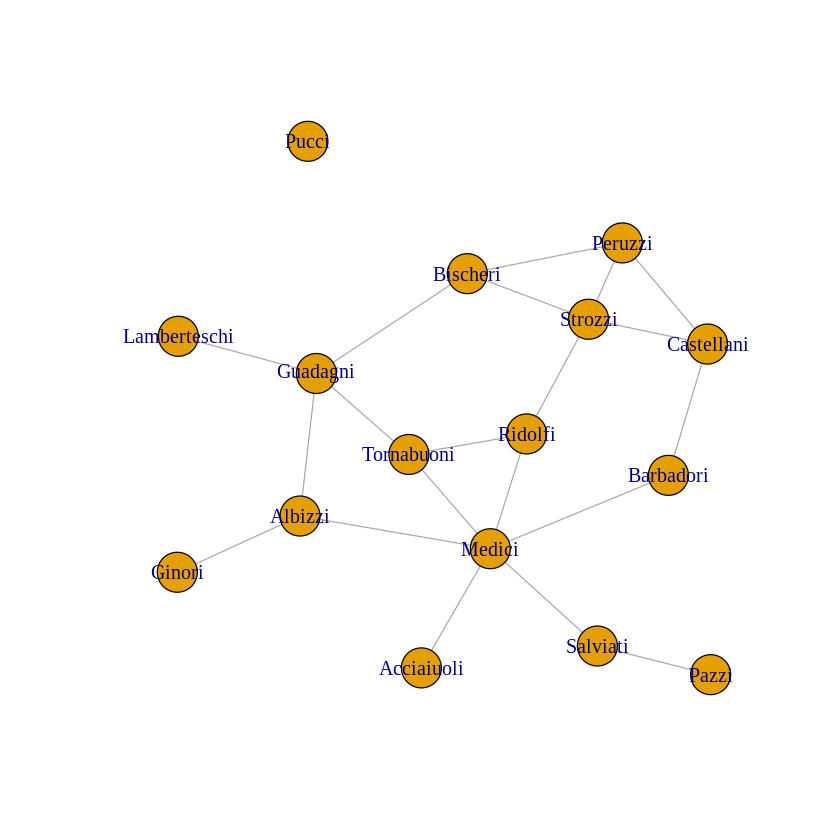

In [2]:
florentine <- read.csv('/content/florentine_marital.csv', comment.char = '#')
florentine <- as.sociomatrix(as.matrix(florentine))
rownames(florentine) <- colnames(florentine)
florentine

f_graph <- graph.adjacency(florentine, mode = 'undirected')
plot(f_graph, layout=layout_with_fr)


На графе несколько выделяется более плотно связанная группа из 11 семей.

## Задание 2. 
Исследуем данную сеть на предмет подгрупп.

### $n$-клики:
$n$-клики можно найти с помощью команды из библиотеки "RBGL":

In [3]:
kCliques(igraph.to.graphNEL(f_graph))

$`1-cliques`
$`1-cliques`[[1]]
[1] "Acciaiuoli" "Medici"    

$`1-cliques`[[2]]
[1] "Albizzi" "Ginori" 

$`1-cliques`[[3]]
[1] "Albizzi"  "Guadagni"

$`1-cliques`[[4]]
[1] "Albizzi" "Medici" 

$`1-cliques`[[5]]
[1] "Barbadori"  "Castellani"

$`1-cliques`[[6]]
[1] "Barbadori" "Medici"   

$`1-cliques`[[7]]
[1] "Bischeri" "Guadagni"

$`1-cliques`[[8]]
[1] "Bischeri" "Peruzzi"  "Strozzi" 

$`1-cliques`[[9]]
[1] "Castellani" "Peruzzi"    "Strozzi"   

$`1-cliques`[[10]]
[1] "Guadagni"     "Lamberteschi"

$`1-cliques`[[11]]
[1] "Guadagni"   "Tornabuoni"

$`1-cliques`[[12]]
[1] "Medici"     "Ridolfi"    "Tornabuoni"

$`1-cliques`[[13]]
[1] "Medici"   "Salviati"

$`1-cliques`[[14]]
[1] "Pazzi"    "Salviati"

$`1-cliques`[[15]]
[1] "Ridolfi" "Strozzi"


$`2-cliques`
$`2-cliques`[[1]]
[1] "Acciaiuoli" "Albizzi"    "Barbadori"  "Medici"     "Ridolfi"   
[6] "Salviati"   "Tornabuoni"

$`2-cliques`[[2]]
[1] "Albizzi"  "Ginori"   "Guadagni" "Medici"  

$`2-cliques`[[3]]
[1] "Albizzi"      "Bischeri"     "Guadagni"     "Lamberteschi" "Tornabuoni"  

$`2-cliques`[[4]]
[1] "Barbadori"  "Castellani" "Medici"     "Ridolfi"    "Strozzi"   

$`2-cliques`[[5]]
[1] "Bischeri"   "Castellani" "Peruzzi"    "Ridolfi"    "Strozzi"   

$`2-cliques`[[6]]
[1] "Barbadori"  "Castellani" "Peruzzi"    "Ridolfi"    "Strozzi"   

$`2-cliques`[[7]]
[1] "Medici"   "Pazzi"    "Salviati"


$`3-cliques`
$`3-cliques`[[1]]
 [1] "Acciaiuoli" "Albizzi"    "Barbadori"  "Castellani" "Guadagni"  
 [6] "Medici"     "Ridolfi"    "Salviati"   "Strozzi"    "Tornabuoni"

$`3-cliques`[[2]]
[1] "Acciaiuoli" "Albizzi"    "Barbadori"  "Ginori"     "Guadagni"  
[6] "Medici"     "Ridolfi"    "Salviati"   "Tornabuoni"

$`3-cliques`[[3]]
[1] "Albizzi"      "Bischeri"     "Ginori"       "Guadagni"     "Lamberteschi"
[6] "Medici"       "Ridolfi"      "Tornabuoni"  

$`3-cliques`[[4]]
 [1] "Albizzi"    "Barbadori"  "Bischeri"   "Castellani" "Guadagni"  
 [6] "Medici"     "Peruzzi"    "Ridolfi"    "Strozzi"    "Tornabuoni"

$`3-cliques`[[5]]
[1] "Acciaiuoli" "Albizzi"    "Barbadori"  "Medici"     "Pazzi"     
[6] "Ridolfi"    "Salviati"   "Tornabuoni"


$`4-cliques`
$`4-cliques`[[1]]
 [1] "Acciaiuoli"   "Albizzi"      "Barbadori"    "Bischeri"     "Castellani"  
 [6] "Ginori"       "Guadagni"     "Lamberteschi" "Medici"       "Peruzzi"     
[11] "Ridolfi"      "Salviati"     "Strozzi"      "Tornabuoni"  

$`4-cliques`[[2]]
 [1] "Acciaiuoli" "Albizzi"    "Barbadori"  "Castellani" "Ginori"    
 [6] "Guadagni"   "Medici"     "Pazzi"      "Ridolfi"    "Salviati"  
[11] "Strozzi"    "Tornabuoni"


$`5-cliques`
$`5-cliques`[[1]]
 [1] "Acciaiuoli"   "Albizzi"      "Barbadori"    "Bischeri"     "Castellani"  
 [6] "Ginori"       "Guadagni"     "Lamberteschi" "Medici"       "Pazzi"       
[11] "Peruzzi"      "Ridolfi"      "Salviati"     "Strozzi"      "Tornabuoni"

Что ожидаемо, при меньших значениях $n$ $n$-клики включают в себя меньше акторов, но при этом таких клик больше. 5-клика включает в себя всю компоненту связности.

При $n \geq 3$ семья Медичи входит во все клики: это обусловлено ее "центральным" положением.

### $n$-кланы

Найдем $n$-кланы с помощью рассмотрения $n$-клик и их фильтрации по признаку того, что геодезическое расстояние по ребрам внутри этой клики не превышает $n$. 

In [4]:
nclan <- function(n){
  k_cliques <- kCliques(igraph.to.graphNEL(f_graph))
  candidates_clans <- k_cliques[[n]]
  n_clans <- list()
  for (cand_clan in candidates_clans) {
    cand <- induced_subgraph(f_graph,cand_clan)
    if (diameter(cand)<=n) {
      n_clans <- append(n_clans, list(cand_clan))
    }
  }

  return(n_clans)
}

nclan(1)
nclan(2)
nclan(3)
nclan(4)
nclan(5)

[[1]]
[1] "Acciaiuoli" "Medici"    

[[2]]
[1] "Albizzi" "Ginori" 

[[3]]
[1] "Albizzi"  "Guadagni"

[[4]]
[1] "Albizzi" "Medici" 

[[5]]
[1] "Barbadori"  "Castellani"

[[6]]
[1] "Barbadori" "Medici"   

[[7]]
[1] "Bischeri" "Guadagni"

[[8]]
[1] "Bischeri" "Peruzzi"  "Strozzi" 

[[9]]
[1] "Castellani" "Peruzzi"    "Strozzi"   

[[10]]
[1] "Guadagni"     "Lamberteschi"

[[11]]
[1] "Guadagni"   "Tornabuoni"

[[12]]
[1] "Medici"     "Ridolfi"    "Tornabuoni"

[[13]]
[1] "Medici"   "Salviati"

[[14]]
[1] "Pazzi"    "Salviati"

[[15]]
[1] "Ridolfi" "Strozzi"

[[1]]
[1] "Acciaiuoli" "Albizzi"    "Barbadori"  "Medici"     "Ridolfi"   
[6] "Salviati"   "Tornabuoni"

[[2]]
[1] "Albizzi"  "Ginori"   "Guadagni" "Medici"  

[[3]]
[1] "Albizzi"      "Bischeri"     "Guadagni"     "Lamberteschi" "Tornabuoni"  

[[4]]
[1] "Barbadori"  "Castellani" "Medici"     "Ridolfi"    "Strozzi"   

[[5]]
[1] "Bischeri"   "Castellani" "Peruzzi"    "Ridolfi"    "Strozzi"   

[[6]]
[1] "Medici"   "Pazzi"    "Salviati"

[[1]]
[1] "Acciaiuoli" "Albizzi"    "Barbadori"  "Ginori"     "Guadagni"  
[6] "Medici"     "Ridolfi"    "Salviati"   "Tornabuoni"

[[2]]
[1] "Albizzi"      "Bischeri"     "Ginori"       "Guadagni"     "Lamberteschi"
[6] "Medici"       "Ridolfi"      "Tornabuoni"  

[[3]]
 [1] "Albizzi"    "Barbadori"  "Bischeri"   "Castellani" "Guadagni"  
 [6] "Medici"     "Peruzzi"    "Ridolfi"    "Strozzi"    "Tornabuoni"

[[4]]
[1] "Acciaiuoli" "Albizzi"    "Barbadori"  "Medici"     "Pazzi"     
[6] "Ridolfi"    "Salviati"   "Tornabuoni"

[[1]]
 [1] "Acciaiuoli"   "Albizzi"      "Barbadori"    "Bischeri"     "Castellani"  
 [6] "Ginori"       "Guadagni"     "Lamberteschi" "Medici"       "Peruzzi"     
[11] "Ridolfi"      "Salviati"     "Strozzi"      "Tornabuoni"  

[[2]]
 [1] "Acciaiuoli" "Albizzi"    "Barbadori"  "Castellani" "Ginori"    
 [6] "Guadagni"   "Medici"     "Pazzi"      "Ridolfi"    "Salviati"  
[11] "Strozzi"    "Tornabuoni"

[[1]]
 [1] "Acciaiuoli"   "Albizzi"      "Barbadori"    "Bischeri"     "Castellani"  
 [6] "Ginori"       "Guadagni"     "Lamberteschi" "Medici"       "Pazzi"       
[11] "Peruzzi"      "Ridolfi"      "Salviati"     "Strozzi"      "Tornabuoni"

Ситуация аналогична ситуации с $n$-кликами: чем больше параметр, тем меньше найдено кланов, но тем больше сами кланы. При $n = 5$ найдена вся компонента связности.



### n-клубы
Для поиска $n$-клубов перебираются все подграфы, начиная с наибольших, и проверяется, что их диаметр меньше $n$, а сам подграф не является подмножеством уже найденного клуба. Эти условия обеспечивают максимальность. Реализация крайне неэффективная, но простая, и для небольших графов работает за приемлемое время.

In [27]:
nclub <- function(n) {
  nclubs <- list()
  for (size in c(16:1)) {
    for (v_comb in combn(V(f_graph), size, simplify = FALSE)) {
      club_check <- induced.subgraph(f_graph, v_comb)
      club_diam <- diameter(club_check, unconnected = FALSE)
      found <- FALSE
      if (club_diam <= n & club_diam < length(v_comb)) {
        for (max_club in nclubs) {
          if (length(setdiff(v_comb, max_club)) == 0) {
            found <- TRUE
            break
          }
        }
        if (found == FALSE)
          nclubs <- append(nclubs, list(v_comb))
      }
    }
  }
  return(nclubs)
}
print('1-clubs:')
nclub(1)
print('2-clubs:')
nclub(2)
print('3-clubs:')
nclub(3)
print('4-clubs:')
nclub(4)
print('5-clubs:')
nclub(5)

[1] "1-clubs:"


[[1]]
+ 3/16 vertices, named, from b3abee8:
[1] Bischeri Peruzzi  Strozzi 

[[2]]
+ 3/16 vertices, named, from b3abee8:
[1] Castellani Peruzzi    Strozzi   

[[3]]
+ 3/16 vertices, named, from b3abee8:
[1] Medici     Ridolfi    Tornabuoni

[[4]]
+ 2/16 vertices, named, from b3abee8:
[1] Acciaiuoli Medici    

[[5]]
+ 2/16 vertices, named, from b3abee8:
[1] Albizzi Ginori 

[[6]]
+ 2/16 vertices, named, from b3abee8:
[1] Albizzi  Guadagni

[[7]]
+ 2/16 vertices, named, from b3abee8:
[1] Albizzi Medici 

[[8]]
+ 2/16 vertices, named, from b3abee8:
[1] Barbadori  Castellani

[[9]]
+ 2/16 vertices, named, from b3abee8:
[1] Barbadori Medici   

[[10]]
+ 2/16 vertices, named, from b3abee8:
[1] Bischeri Guadagni

[[11]]
+ 2/16 vertices, named, from b3abee8:
[1] Guadagni     Lamberteschi

[[12]]
+ 2/16 vertices, named, from b3abee8:
[1] Guadagni   Tornabuoni

[[13]]
+ 2/16 vertices, named, from b3abee8:
[1] Medici   Salviati

[[14]]
+ 2/16 vertices, named, from b3abee8:
[1] Pazzi    Salviati



[1] "2-clubs:"


[[1]]
+ 7/16 vertices, named, from b3abee8:
[1] Acciaiuoli Albizzi    Barbadori  Medici     Ridolfi    Salviati   Tornabuoni

[[2]]
+ 5/16 vertices, named, from b3abee8:
[1] Albizzi      Bischeri     Guadagni     Lamberteschi Tornabuoni  

[[3]]
+ 5/16 vertices, named, from b3abee8:
[1] Albizzi    Guadagni   Medici     Ridolfi    Tornabuoni

[[4]]
+ 5/16 vertices, named, from b3abee8:
[1] Barbadori  Castellani Medici     Ridolfi    Strozzi   

[[5]]
+ 5/16 vertices, named, from b3abee8:
[1] Bischeri   Castellani Peruzzi    Ridolfi    Strozzi   

[[6]]
+ 5/16 vertices, named, from b3abee8:
[1] Bischeri   Guadagni   Ridolfi    Strozzi    Tornabuoni

[[7]]
+ 4/16 vertices, named, from b3abee8:
[1] Albizzi  Ginori   Guadagni Medici  

[[8]]
+ 4/16 vertices, named, from b3abee8:
[1] Barbadori  Castellani Peruzzi    Strozzi   

[[9]]
+ 4/16 vertices, named, from b3abee8:
[1] Bischeri Guadagni Peruzzi  Strozzi 

[[10]]
+ 4/16 vertices, named, from b3abee8:
[1] Medici     Ridolfi    Strozzi   

[1] "3-clubs:"


[[1]]
+ 10/16 vertices, named, from b3abee8:
 [1] Albizzi    Barbadori  Bischeri   Castellani Guadagni   Medici    
 [7] Peruzzi    Ridolfi    Strozzi    Tornabuoni

[[2]]
+ 9/16 vertices, named, from b3abee8:
[1] Acciaiuoli Albizzi    Barbadori  Castellani Medici     Ridolfi    Salviati  
[8] Strozzi    Tornabuoni

[[3]]
+ 9/16 vertices, named, from b3abee8:
[1] Acciaiuoli Albizzi    Barbadori  Ginori     Guadagni   Medici     Ridolfi   
[8] Salviati   Tornabuoni

[[4]]
+ 9/16 vertices, named, from b3abee8:
[1] Acciaiuoli Albizzi    Barbadori  Guadagni   Medici     Ridolfi    Salviati  
[8] Strozzi    Tornabuoni

[[5]]
+ 9/16 vertices, named, from b3abee8:
[1] Albizzi      Bischeri     Guadagni     Lamberteschi Medici      
[6] Peruzzi      Ridolfi      Strozzi      Tornabuoni  

[[6]]
+ 8/16 vertices, named, from b3abee8:
[1] Acciaiuoli Albizzi    Barbadori  Medici     Pazzi      Ridolfi    Salviati  
[8] Tornabuoni

[[7]]
+ 8/16 vertices, named, from b3abee8:
[1] Albizzi      Bische

[1] "4-clubs:"


[[1]]
+ 14/16 vertices, named, from b3abee8:
 [1] Acciaiuoli   Albizzi      Barbadori    Bischeri     Castellani  
 [6] Ginori       Guadagni     Lamberteschi Medici       Peruzzi     
[11] Ridolfi      Salviati     Strozzi      Tornabuoni  

[[2]]
+ 12/16 vertices, named, from b3abee8:
 [1] Acciaiuoli Albizzi    Barbadori  Castellani Ginori     Guadagni  
 [7] Medici     Pazzi      Ridolfi    Salviati   Strozzi    Tornabuoni

[[3]]
+ 1/16 vertex, named, from b3abee8:
[1] Pucci


[1] "5-clubs:"


[[1]]
+ 15/16 vertices, named, from b3abee8:
 [1] Acciaiuoli   Albizzi      Barbadori    Bischeri     Castellani  
 [6] Ginori       Guadagni     Lamberteschi Medici       Pazzi       
[11] Peruzzi      Ridolfi      Salviati     Strozzi      Tornabuoni  

[[2]]
+ 1/16 vertex, named, from b3abee8:
[1] Pucci


Ситуация аналогична предыдущим: количество подмножеств уменьшается с увеличением $n$, а их размер увеличивается.

### $k$-ядра

In [39]:
coreness(f_graph)
table(coreness(f_graph))

Acciaiuoli      Albizzi    Barbadori     Bischeri   Castellani       Ginori 
           1            2            2            2            2            1 
    Guadagni Lamberteschi       Medici        Pazzi      Peruzzi        Pucci 
           2            1            2            1            2            0 
     Ridolfi     Salviati      Strozzi   Tornabuoni 
           2            1            2            2


 0  1  2 
 1  5 10 

Большинство вершин состоит в 2-ядре. 0-ядро образует вершина, не состоящая в компоненте связности.

### $k$-плексы

В отличие от прочих подгрупп, согласно определению, $k$-плексы могут быть несвязными графами.

Использована аналогичная методика поиска с перебором всех подграфов: здесь она более уместна из-за указанного выше свойства.

При этом число обнаружимых подгрупп становится значительно больше.

In [33]:
kplex <- function(n) {
  kplexes <- list()
  for (size in c(16:1)) {
    for (v_comb in combn(V(f_graph), size, simplify = FALSE)) {
      kplex_check <- induced.subgraph(f_graph, v_comb)
      min_deg <- min(igraph::degree(kplex_check))
      found <- FALSE
      if (min_deg >= length(v_comb) - n) {
        for (max_kplex in kplexes) {
          if (length(setdiff(v_comb, max_kplex)) == 0) {
            found <- TRUE
            break
          }
        }
        if (found == FALSE)
          kplexes <- append(kplexes, list(v_comb))
      }
    }
  }
  return(kplexes)
}

print('1-plexes:')
kplex(1)
print('2-plexes:')
kplex(2)
print('3-plexes:')
kplex(3)
print('4-plexes:')
kplex(4)
print('5-plexes:')
kplex(5)


[1] "1-plexes:"


[[1]]
+ 3/16 vertices, named, from b3abee8:
[1] Bischeri Peruzzi  Strozzi 

[[2]]
+ 3/16 vertices, named, from b3abee8:
[1] Castellani Peruzzi    Strozzi   

[[3]]
+ 3/16 vertices, named, from b3abee8:
[1] Medici     Ridolfi    Tornabuoni

[[4]]
+ 2/16 vertices, named, from b3abee8:
[1] Acciaiuoli Medici    

[[5]]
+ 2/16 vertices, named, from b3abee8:
[1] Albizzi Ginori 

[[6]]
+ 2/16 vertices, named, from b3abee8:
[1] Albizzi  Guadagni

[[7]]
+ 2/16 vertices, named, from b3abee8:
[1] Albizzi Medici 

[[8]]
+ 2/16 vertices, named, from b3abee8:
[1] Barbadori  Castellani

[[9]]
+ 2/16 vertices, named, from b3abee8:
[1] Barbadori Medici   

[[10]]
+ 2/16 vertices, named, from b3abee8:
[1] Bischeri Guadagni

[[11]]
+ 2/16 vertices, named, from b3abee8:
[1] Guadagni     Lamberteschi

[[12]]
+ 2/16 vertices, named, from b3abee8:
[1] Guadagni   Tornabuoni

[[13]]
+ 2/16 vertices, named, from b3abee8:
[1] Medici   Salviati

[[14]]
+ 2/16 vertices, named, from b3abee8:
[1] Pazzi    Salviati



[1] "2-plexes:"


[[1]]
+ 4/16 vertices, named, from b3abee8:
[1] Albizzi    Guadagni   Medici     Tornabuoni

[[2]]
+ 4/16 vertices, named, from b3abee8:
[1] Bischeri   Castellani Peruzzi    Strozzi   

[[3]]
+ 3/16 vertices, named, from b3abee8:
[1] Acciaiuoli Albizzi    Medici    

[[4]]
+ 3/16 vertices, named, from b3abee8:
[1] Acciaiuoli Barbadori  Medici    

[[5]]
+ 3/16 vertices, named, from b3abee8:
[1] Acciaiuoli Medici     Ridolfi   

[[6]]
+ 3/16 vertices, named, from b3abee8:
[1] Acciaiuoli Medici     Salviati  

[[7]]
+ 3/16 vertices, named, from b3abee8:
[1] Acciaiuoli Medici     Tornabuoni

[[8]]
+ 3/16 vertices, named, from b3abee8:
[1] Albizzi   Barbadori Medici   

[[9]]
+ 3/16 vertices, named, from b3abee8:
[1] Albizzi  Bischeri Guadagni

[[10]]
+ 3/16 vertices, named, from b3abee8:
[1] Albizzi  Ginori   Guadagni

[[11]]
+ 3/16 vertices, named, from b3abee8:
[1] Albizzi Ginori  Medici 

[[12]]
+ 3/16 vertices, named, from b3abee8:
[1] Albizzi      Guadagni     Lamberteschi

[[13]]
+ 

[1] "3-plexes:"


[[1]]
+ 5/16 vertices, named, from b3abee8:
[1] Albizzi    Guadagni   Medici     Ridolfi    Tornabuoni

[[2]]
+ 5/16 vertices, named, from b3abee8:
[1] Barbadori  Castellani Medici     Ridolfi    Strozzi   

[[3]]
+ 5/16 vertices, named, from b3abee8:
[1] Bischeri   Guadagni   Ridolfi    Strozzi    Tornabuoni

[[4]]
+ 4/16 vertices, named, from b3abee8:
[1] Acciaiuoli Albizzi    Barbadori  Medici    

[[5]]
+ 4/16 vertices, named, from b3abee8:
[1] Acciaiuoli Albizzi    Ginori     Medici    

[[6]]
+ 4/16 vertices, named, from b3abee8:
[1] Acciaiuoli Albizzi    Guadagni   Medici    

[[7]]
+ 4/16 vertices, named, from b3abee8:
[1] Acciaiuoli Albizzi    Medici     Ridolfi   

[[8]]
+ 4/16 vertices, named, from b3abee8:
[1] Acciaiuoli Albizzi    Medici     Salviati  

[[9]]
+ 4/16 vertices, named, from b3abee8:
[1] Acciaiuoli Albizzi    Medici     Tornabuoni

[[10]]
+ 4/16 vertices, named, from b3abee8:
[1] Acciaiuoli Barbadori  Castellani Medici    

[[11]]
+ 4/16 vertices, named, from 

[1] "4-plexes:"


[[1]]
+ 6/16 vertices, named, from b3abee8:
[1] Albizzi  Bischeri Guadagni Medici   Ridolfi  Strozzi 

[[2]]
+ 6/16 vertices, named, from b3abee8:
[1] Barbadori  Castellani Medici     Peruzzi    Ridolfi    Strozzi   

[[3]]
+ 6/16 vertices, named, from b3abee8:
[1] Barbadori  Castellani Medici     Ridolfi    Strozzi    Tornabuoni

[[4]]
+ 6/16 vertices, named, from b3abee8:
[1] Bischeri   Guadagni   Medici     Ridolfi    Strozzi    Tornabuoni

[[5]]
+ 6/16 vertices, named, from b3abee8:
[1] Bischeri   Guadagni   Peruzzi    Ridolfi    Strozzi    Tornabuoni

[[6]]
+ 6/16 vertices, named, from b3abee8:
[1] Bischeri   Medici     Peruzzi    Ridolfi    Strozzi    Tornabuoni

[[7]]
+ 6/16 vertices, named, from b3abee8:
[1] Castellani Medici     Peruzzi    Ridolfi    Strozzi    Tornabuoni

[[8]]
+ 5/16 vertices, named, from b3abee8:
[1] Acciaiuoli Albizzi    Barbadori  Castellani Medici    

[[9]]
+ 5/16 vertices, named, from b3abee8:
[1] Acciaiuoli Albizzi    Barbadori  Ginori     Medici    


[1] "5-plexes:"


[[1]]
+ 7/16 vertices, named, from b3abee8:
[1] Albizzi    Barbadori  Bischeri   Castellani Guadagni   Medici     Peruzzi   

[[2]]
+ 7/16 vertices, named, from b3abee8:
[1] Albizzi    Barbadori  Bischeri   Castellani Guadagni   Medici     Strozzi   

[[3]]
+ 7/16 vertices, named, from b3abee8:
[1] Albizzi  Bischeri Guadagni Medici   Peruzzi  Ridolfi  Strozzi 

[[4]]
+ 7/16 vertices, named, from b3abee8:
[1] Albizzi    Bischeri   Guadagni   Medici     Peruzzi    Strozzi    Tornabuoni

[[5]]
+ 7/16 vertices, named, from b3abee8:
[1] Albizzi    Bischeri   Guadagni   Medici     Ridolfi    Strozzi    Tornabuoni

[[6]]
+ 7/16 vertices, named, from b3abee8:
[1] Albizzi    Castellani Guadagni   Medici     Peruzzi    Strozzi    Tornabuoni

[[7]]
+ 7/16 vertices, named, from b3abee8:
[1] Barbadori  Bischeri   Castellani Guadagni   Medici     Peruzzi    Tornabuoni

[[8]]
+ 7/16 vertices, named, from b3abee8:
[1] Barbadori  Bischeri   Castellani Guadagni   Medici     Strozzi    Tornabuoni

[[9]]


С увеличением значения $k$ количество найденных подгрупп растет крайне быстро.

## Задание 3.
Исследуем алгоритмы обнаружения сообществ (вариант $(69 \mod 3) + 1 = 1$).

### Edge-betweenness
Показатель "edge_betweenneess" для ребра измеряет количество кратчайших путей через него. Удаляя ребра с наибольшим значением этого показателя, можно получить иерархиечкую схему графа в виде дерева с листьями-вершинами и корнем, обозначающим весь граф.  


[1] 0.3975

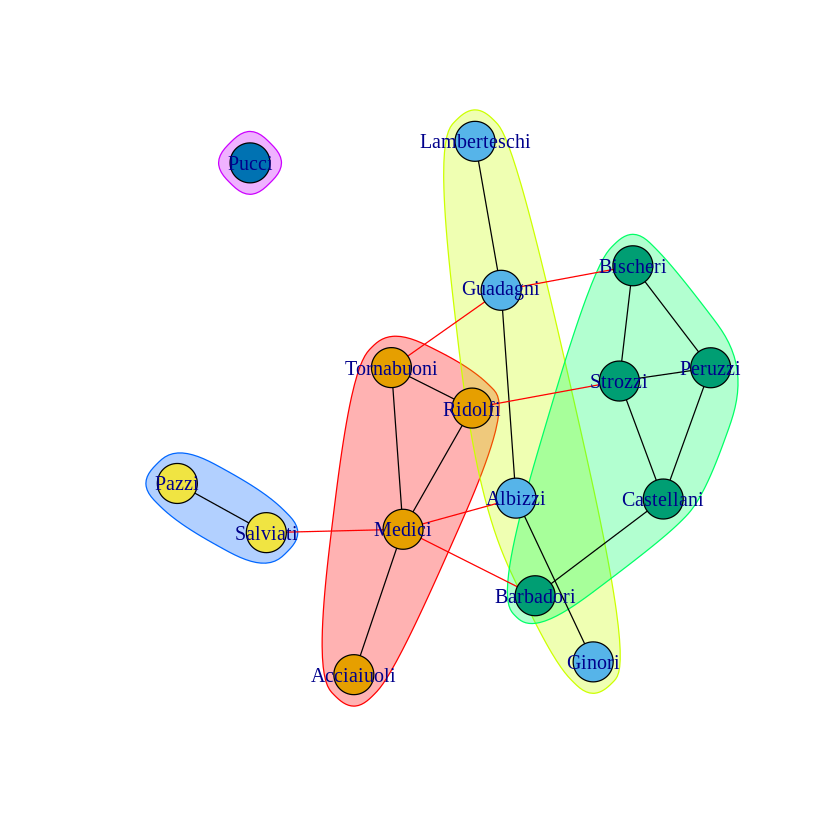

In [35]:
partition <- cluster_edge_betweenness(f_graph)
modularity(partition)
plot(partition, f_graph)

### Leading eigenvector
Метод главного собственного вектора предполагает вычисление собственного вектора матрицы модулярности для наибольшего собственного числа и разделение вершин на кластеры в зависимости от знака соответствующих чисел в собственном векторе.

[1] 0.36375

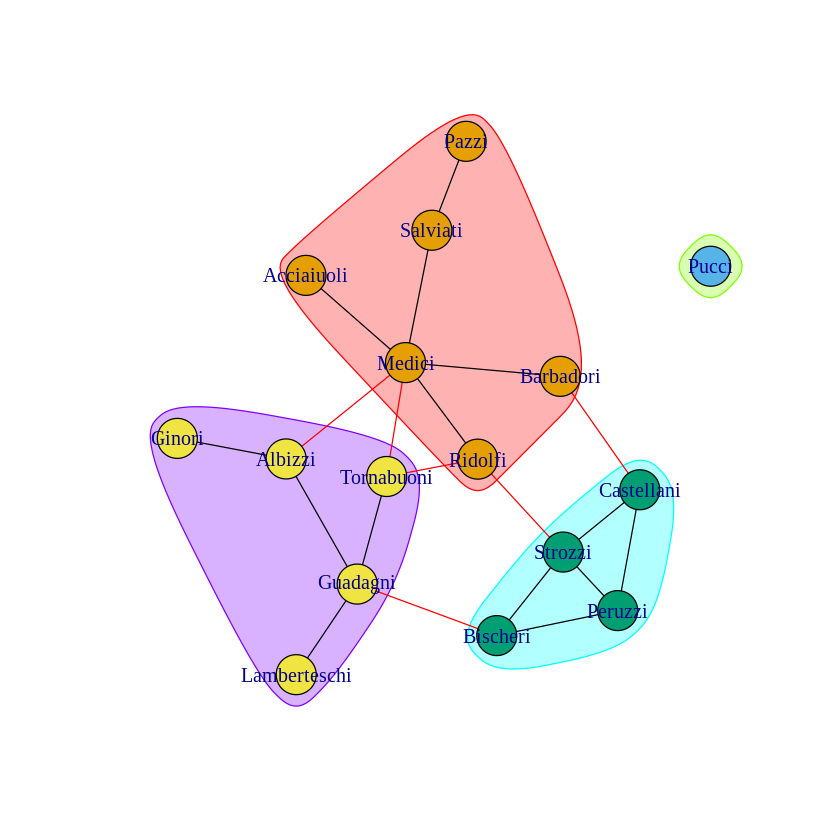

In [36]:
partition <- cluster_leading_eigen(f_graph)
modularity(partition)
plot(partition, f_graph)

### Fast-greedy
Жадный алгоритм предполагает объединение тех кластеров/вершин, которые максимально увеличивают модулярность на каждом шаге. В конечном итоге выбирается то разбиение, модулярность которого максимальна.

[1] 0.39875

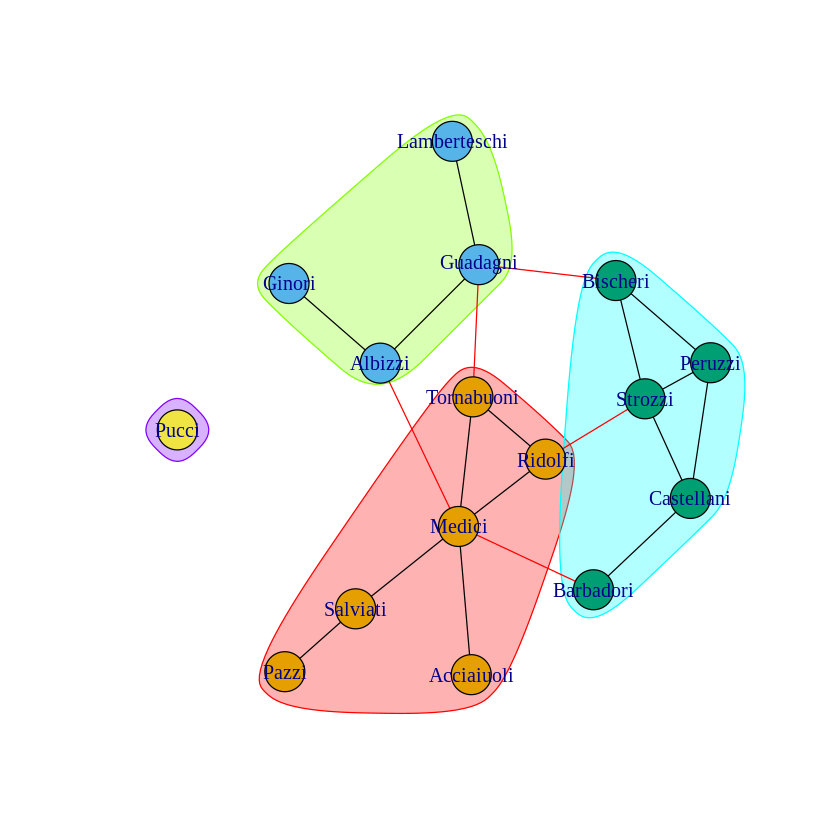

In [37]:
partition <- cluster_fast_greedy(f_graph)
modularity(partition)
plot(partition, f_graph)

Алгоритм наибольшего собственного вектора дал меньшее значение модулярности, чем остальные алгоритмы, а жадный алгоритм — наибольшее.

Каждый алгоритм выделил вершину, не состоящую в компоненте связности, в свой кластер.

## Задание 4.
Извлечём матрицу инцидентности из файла "ceo.csv".
Обозначим буквами события и числами — акторов.

In [39]:
ceo <- read.csv("ceo.csv", header= FALSE, comment.char = '#')

ceo_matrix <- data.matrix(ceo)
colnames(ceo_matrix) <- LETTERS[1:15]
rownames(ceo_matrix) <- c(1:26)
ceo_graph <- graph_from_incidence_matrix(ceo_matrix)
ceo_matrix

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
5,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
6,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
7,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0
8,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
9,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0
10,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


## Задание 5.
Сеть в виде биграфа можно отобразить с помощью настройки параметра "layout" функции "plot".

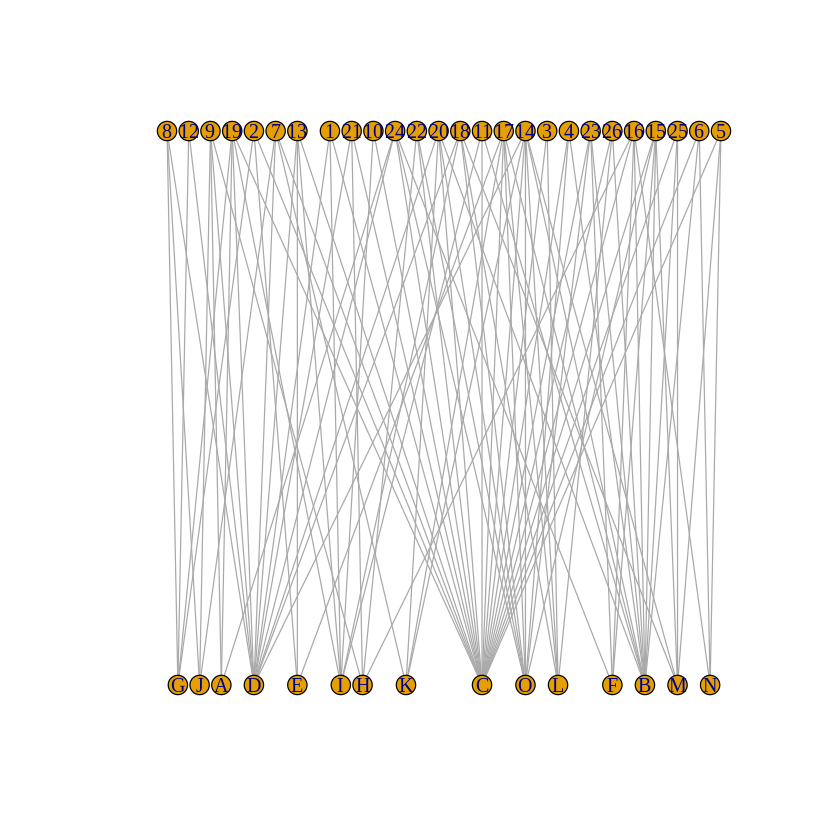

In [45]:
plot(ceo_graph, layout = layout_as_bipartite, vertex.size = 7)

##Задание 6.
Cеть в виде гиперграфа можно отобразить с помощью пакета HyperG.

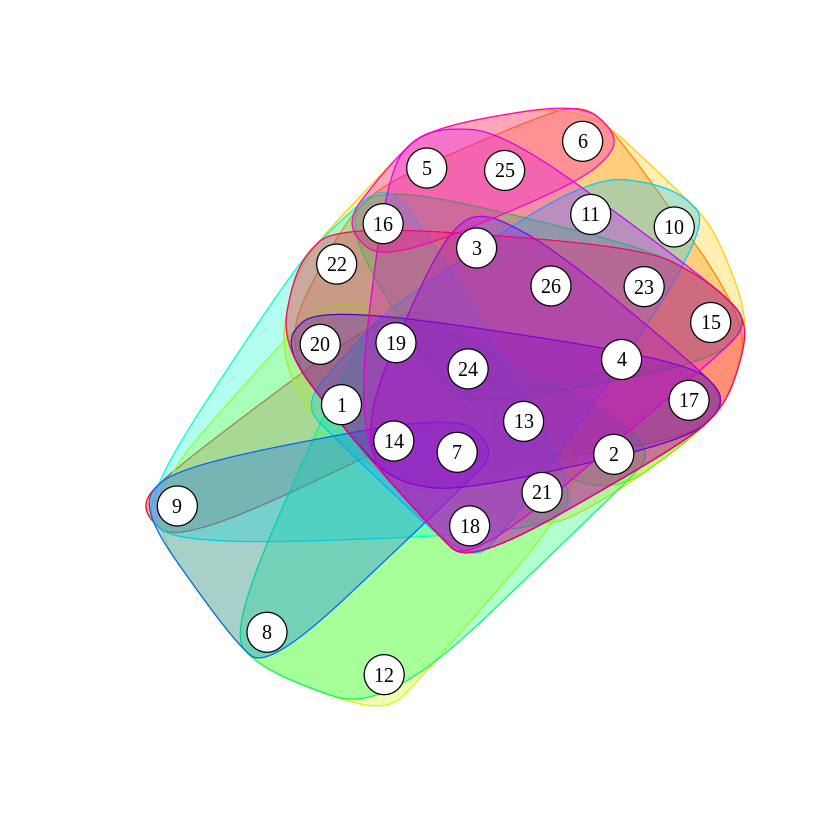

In [53]:
h1 <- hypergraph_from_incidence_matrix(t(ceo_matrix))
plot(h1,
     vertex.color = "white",
     vertex.label.color = "black")

Отобразим сеть в виде двойственного гиперграфа.

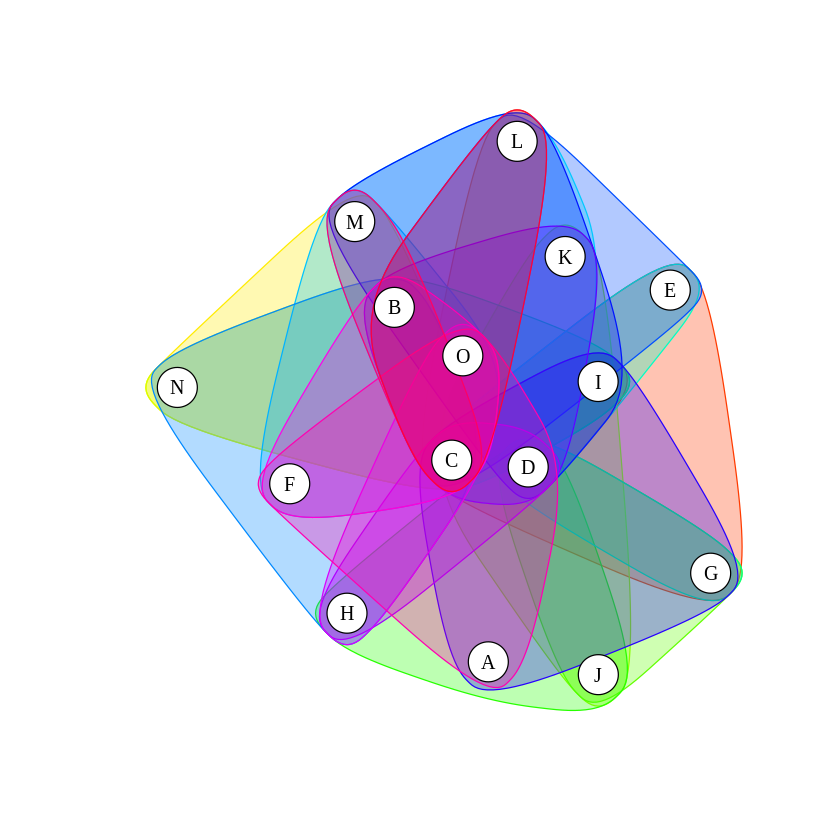

In [52]:
h2 <- hypergraph_from_incidence_matrix(ceo_matrix)
plot(h2,
     vertex.color = "white",
     vertex.label.color = "black")

## Задание 7.
Представим сеть аффилированости в виде двух одномодальных сетей. 

Сначала построим матрицу соучастия акторов и по ней отобразим одномодальную сеть.

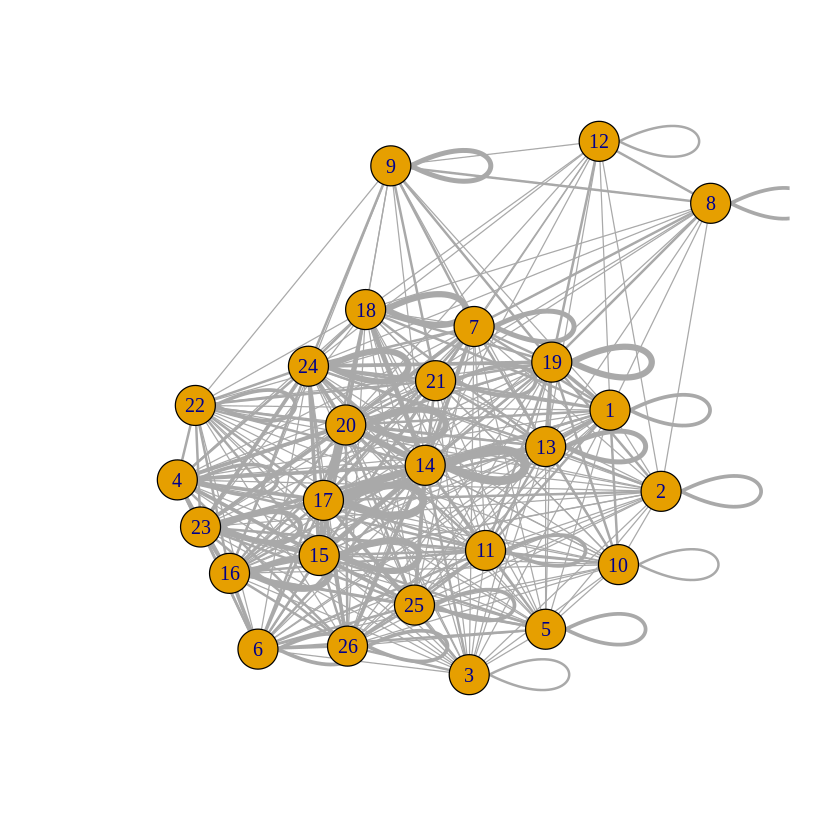

In [64]:
comembership_m <- ceo_matrix %*% t(ceo_matrix)
comembership_g <- graph.adjacency(comembership_m, mode='undirected', weighted = TRUE)

plot(comembership_g, 
     vertex.size = 15, 
     edge.width = E(comembership_g)$weight)

Построим матрицу перекрытия событий и по ней отобразим одномодальную сеть.

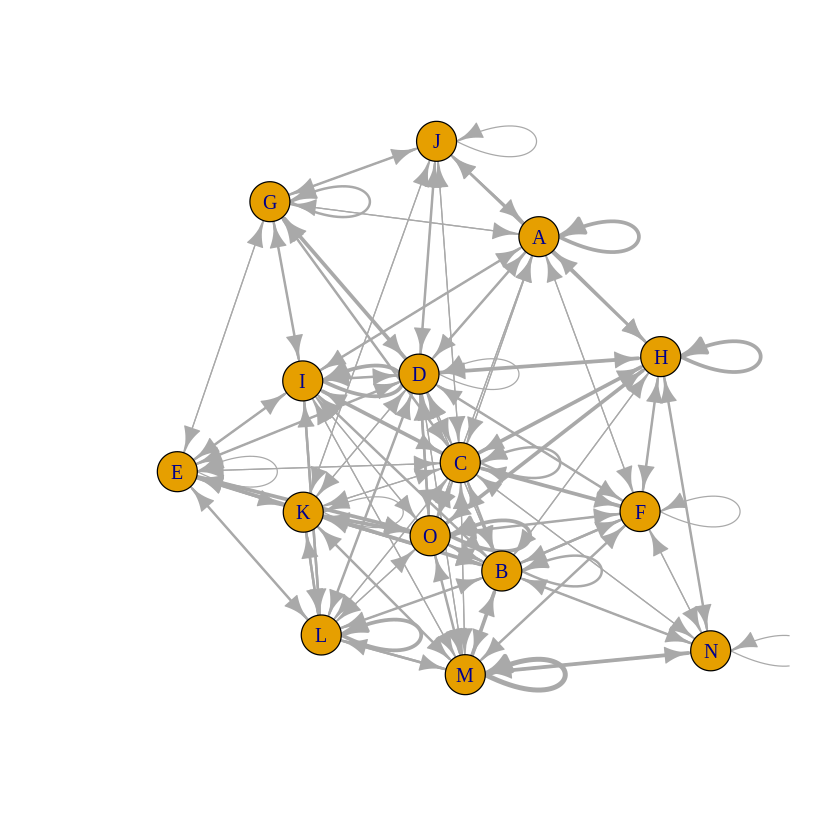

In [65]:
overlap_m <- t(ceo_matrix) %*% ceo_matrix
overlap_g <- graph.adjacency(overlap_m, weighted = TRUE)

plot(overlap_g,
     vertex.size = 15, 
     edge.width = E(comembership_g)$weight)

"Центральным" событием оказалось событие "C", а "центральным" актором — №14.

## Задание 8.
Вычислим степени участия акторов и их среднее значение.

In [67]:
as.data.frame(rowSums(ceo_matrix))
mean(rowSums(ceo_matrix))

,rowSums(ceo_matrix)
,<dbl>
1,3
2,3
3,2
4,3
5,3
6,3
7,4
8,3
9,4


[1] 3.769231

Действительно, актор #14 оказался одним из наиболее активных. Среднее значение невелико по сравнению с числом событий.

## Задание 9.
Вычислим размеры событий и их среднее.

In [68]:
as.data.frame(colSums(ceo_matrix))
mean(colSums(ceo_matrix))

,colSums(ceo_matrix)
,<dbl>
A,3
B,11
C,22
D,12
E,3
F,4
G,4
H,4
I,6


[1] 6.533333

Событие "C" действительно оказалось наибольшим: в нем участвовали почти все акторы. При этом среднее участие составляет около четверти от числа акторов, что достаточно невелико.

## Задание 10.
Вычислим плотности для отношения участия и перекрытия. 

In [75]:
print('comembership density:')
1/(nrow(comembership_m)*(nrow(comembership_m) - 1))*(sum(comembership_m) - sum(diag(comembership_m)))
print('overlap density:')
1/(ncol(overlap_m)*(ncol(overlap_m) - 1))*(sum(overlap_m) - sum(diag(overlap_m)))


[1] "comembership density:"


[1] 1.412308

[1] "overlap density:"


[1] 1.485714

Плотности достаточно невелики и почти совпадают.

**Задание 11.** Вычислим диаметр сети аффилированности.

In [73]:
diameter(ceo_graph)

[1] 5

## Задание 12.
Определим клики уровня $c = \{4, 3\}$ для отношения соучастия и клики уровня $c = \{6, 5, 4, 3, 2\}$ для отношения перекрытия событий.

In [86]:
print("Клики для отношения соучастия:")
for (level in comembership_levels <- c(4, 3)) {
    comembership_cliques <- delete_edges(comembership_g, which(E(comembership_g)$weight < level))
    print(level)
    print(max_cliques(comembership_cliques, min = 3))
}

print("Клики для отношения перекрытия:")
for (level in overlap_levels <- c(6:2)) {
    overlap_cliques <- delete_edges(overlap_g, which(E(overlap_g)$weight < level))
    print(level)
    print(max_cliques(comembership_cliques, min = 3))
}

[1] "Клики для отношения соучастия:"
[1] 4
[[1]]
+ 3/26 vertices, named, from 2e314f2:
[1] 20 14 17

[1] 3
[[1]]
+ 3/26 vertices, named, from 8278773:
[1] 1  13 19

[[2]]
+ 3/26 vertices, named, from 8278773:
[1] 7  14 20

[[3]]
+ 3/26 vertices, named, from 8278773:
[1] 16 15 23

[[4]]
+ 3/26 vertices, named, from 8278773:
[1] 25 14 15

[[5]]
+ 3/26 vertices, named, from 8278773:
[1] 26 14 17

[[6]]
+ 5/26 vertices, named, from 8278773:
[1] 24 14 23 20 15

[[7]]
+ 6/26 vertices, named, from 8278773:
[1] 14 4  23 20 17 15

[1] "Клики для отношения перекрытия:"
[1] 6
[[1]]
+ 3/26 vertices, named, from 8278773:
[1] 1  13 19

[[2]]
+ 3/26 vertices, named, from 8278773:
[1] 7  14 20

[[3]]
+ 3/26 vertices, named, from 8278773:
[1] 16 15 23

[[4]]
+ 3/26 vertices, named, from 8278773:
[1] 25 14 15

[[5]]
+ 3/26 vertices, named, from 8278773:
[1] 26 14 17

[[6]]
+ 5/26 vertices, named, from 8278773:
[1] 24 14 23 20 15

[[7]]
+ 6/26 vertices, named, from 8278773:
[1] 14 4  23 20 17 15

[1] 5
[

Большее значение уровня обеспечивает меньшее количество клик, так как накладывается более жесткое ограничение.

## Задание 13.
Определим отношение шансов.

In [91]:
x_k_l <- overlap_m
x_nk_nl <- (1 - t(ceo_matrix)) %*% (1 - ceo_matrix)
x_nk_l <- (1 - t(ceo_matrix)) %*% ceo_matrix
x_k_nl <- t(ceo_matrix) %*% (1 - ceo_matrix)
  
x_k_l*x_nk_nl/x_nk_l/x_k_nl

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
A,Inf,0.0000000,0.30000000,Inf,0.0000000,3.3333333,3.333333,3.3333333,1.8000000,5.25000000,0.000000,0.0000000,0.0000000,0.000000,0.9375000
B,0.000000,Inf,Inf,0.1111111,0.6500000,5.2500000,0.000000,0.4000000,0.2000000,0.00000000,5.250000,2.4375000,2.4375000,3.111111,4.8000000
C,0.300000,Inf,Inf,0.0000000,Inf,Inf,0.100000,0.4736842,0.8823529,0.04761905,Inf,0.6666667,0.6666667,Inf,1.7142857
D,Inf,0.1111111,0.00000000,Inf,0.5454545,0.3333333,4.333333,1.2000000,3.0000000,Inf,4.333333,0.7333333,0.7333333,0.000000,0.9000000
E,0.000000,0.6500000,Inf,0.5454545,Inf,0.0000000,3.333333,0.0000000,1.8000000,0.00000000,3.333333,2.3750000,0.0000000,0.000000,0.9375000
F,3.333333,5.2500000,Inf,0.3333333,0.0000000,Inf,0.000000,2.1111111,0.0000000,0.00000000,0.000000,0.0000000,1.5000000,3.333333,8.0000000
G,3.333333,0.0000000,0.10000000,4.3333333,3.3333333,0.0000000,Inf,0.0000000,1.1333333,3.33333333,0.000000,0.0000000,0.0000000,0.000000,0.0000000
H,3.333333,0.4000000,0.47368421,1.2000000,0.0000000,2.1111111,0.000000,Inf,0.0000000,3.33333333,0.000000,0.0000000,0.0000000,3.333333,0.5833333
I,1.800000,0.2000000,0.88235294,3.0000000,1.8000000,0.0000000,1.133333,0.0000000,Inf,0.00000000,0.000000,0.8000000,0.8000000,0.000000,0.3000000
J,5.250000,0.0000000,0.04761905,Inf,0.0000000,0.0000000,3.333333,3.3333333,0.0000000,Inf,3.333333,0.0000000,0.0000000,0.000000,0.0000000


Бесконечность в матрице значит, что в данных событиях участвует одинаковый набор акторов — естественно, на главной диагонали будут бесконечности. 0 значит, что общих участников у данных событий нет.

# Выводы
В рамках данной работы были рассмотрены способы анализа сетей аффилированности и подгрупп в социальных сетях; реализованы некоторые алгоритмы поиска подгрупп в сетях, изучена конкретная сеть аффилированности и построено отношение шансов для нее.

